[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1u9_pY4EdCZQqwiQ617lKMPogbicdPPh3/view?usp=sharing)

# k-NN

Exemplo de aplicação do algoritmo k-NN na base de dados [Iris](https://archive.ics.uci.edu/ml/datasets/iris).

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Carregar a base de dados Iris.

A base possui 150 amostras, cada uma com 4 features. As amostras podem ser de três classes:

0 - setosa

1 - versicolor

2 - virginica

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = iris.feature_names)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Novo dataset é criado com informações sem rótulo para futura classificação.

Dividir a base em treinamento e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


Pode-se utilizar distâncias de diferentes tipos para o classificador k-NN.

1. euclidean
2. manhattan
3. chebyshev
4. minkowski
5. hamming
6. jaccard
7. matching

e muitas outras. Para mais detalhes, visite: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html


O parâmetro n_neighbors indica o número de vizinhos a ser utilizado.

Mudanças na distância e no número de vizinhos podem alterar o resultado da classificação. Por exemplo, a distância euclidiana é mais sensível ao número de vizinhos do que a chebyshev.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

clr = classification_report(y_test, y_pred, target_names=iris.target_names)
print(clr)
#clr_df = pd.DataFrame(clr)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.96      0.96      0.96        23
   virginica       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
k_range = range(1,20)
scores = {}
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)

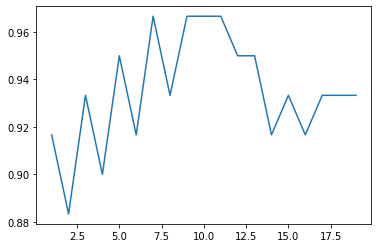

In [ ]:
plt.plot(k_range,list(scores.values()))